In [1]:
from sklearn import datasets, linear_model, metrics, preprocessing
import matplotlib.pyplot as plt
import numpy as np
import scipy
import time

In [2]:
#ustawienia
time_multiplicator = 100
seed = 244810
samples = 2410
noise = 16

In [3]:
#tworzenie dataset
x,Y  = datasets.make_regression(n_features=1,noise=noise,n_samples=samples, random_state=seed)

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(1)
X = poly.fit_transform(x)


In [5]:
#podział dataset na dane treningowe i testowe
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)


### Metoda numeryczna

### $$ L(θ) = \frac{1}{N}(Y - X^T θ)^{T} (Y - X^T θ) $$

In [6]:
def func(w, X, Y):
    xt_w = np.matmul(X, w)
    y_xt_w = np.subtract(Y, xt_w)
    return np.matmul(np.transpose(y_xt_w),(y_xt_w))*(1/len(X))

In [7]:
start_num = time.time()
for i in range(time_multiplicator):
    ans_num = scipy.optimize.minimize(func,[1,1], args=(X_train,y_train),method="Powell")
num_ex_time = (time.time() - start_num)/time_multiplicator

In [8]:
print(ans_num.x)

[-0.54968696 37.26315789]


### Metoda analityczna

### $$ θ = (X^T X)^{-1} X^T Y $$

In [9]:
#rozbite na części
#X^T Y
xty = np.matmul(np.transpose(X),Y)
#X^T X
xtx = np.matmul(np.transpose(X),X)
#(X^T X)^-1
xtxinv =np.linalg.inv(xtx)
#answer
ans = np.matmul(xtxinv,xty)

In [10]:
start_ana = time.time()
for i in range(time_multiplicator):
    ans_ana = np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.matmul(np.transpose(X),Y))
ana_ex_time = (time.time() - start_ana)/time_multiplicator 

In [11]:
print(ans_ana)

[-0.46607324 37.14094433]


### Wykres

In [12]:
X_train_plot = np.delete(X_train, 0,1)
X_test_plot = np.delete(X_test, 0,1)

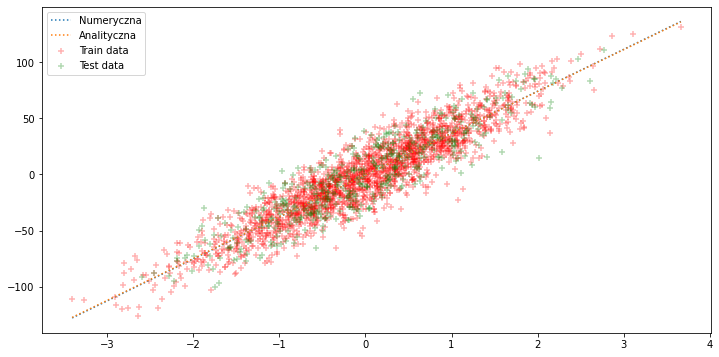

In [13]:
plt.figure(figsize=(12,6))

plt.scatter(X_train_plot,y_train, color='red', alpha=0.3, marker='+', label="Train data")

plt.scatter(X_test_plot,y_test, color='green', alpha=0.3, marker='+', label="Test data")

plt.plot([min(x),max(x)], [ans_num.x[1]*min(x)+ans_num.x[0] , ans_num.x[1]*max(x)+ans_num.x[0]], label="Numeryczna", linestyle=":" )

plt.plot([min(x),max(x)], [ans_ana[1]*min(x)+ans_ana[0] , ans_ana[1]*max(x)+ans_ana[0]], label="Analityczna", linestyle=":" )

plt.legend()



### MSE dla danych testowych

In [14]:
y_pred_an = np.empty(len(y_test))

for i in range(len(y_test)):
    y_pred_an[i] = ans_ana[1]*X_test_plot[i][0]+ans_ana[0]

MSE_an = np.square(np.subtract(y_test, y_pred_an )).mean()

In [15]:
y_pred_num = np.empty(len(y_test))

for i in range(len(y_test)):
    y_pred_num[i] = ans_num.x[1]*X_test_plot[i][0]+ans_num.x[0]

MSE_num = np.square(np.subtract(y_test, y_pred_num )).mean()

### Porównanie metody numerycznej i analitycznej

In [16]:
print("MSE dla metody numerycznej: ",MSE_num)
print("MSE dla metody analitycznej:",MSE_an)

MSE dla metody numerycznej:  288.7915366948046
MSE dla metody analitycznej: 288.59636762506653


In [17]:
print("Czas wykonania dla metody numerycznej: ",'{:f}'.format(num_ex_time))
print("Czas wykonania dla metody analitycznej:",'{:f}'.format(ana_ex_time))

Czas wykonania dla metody numerycznej:  0.002331
Czas wykonania dla metody analitycznej: 0.000020


In [18]:
#print("Czas wykonania dla metody numerycznej: ",'{:.3e}'.format(num_ex_time))
#print("Czas wykonania dla metody analitycznej:",'{:.3e}'.format(ana_ex_time))

# FlapPy Bird

In [19]:
flappy1 = np.genfromtxt('data/2_3.csv', delimiter=',')

In [20]:
fl_X= np.reshape(flappy1[:,0],(len(flappy1),1))
fl_y= np.reshape(flappy1[:,1],(len(flappy1),1))

def norm(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))
fl_X = norm(fl_X)



### Model sklearn

In [21]:
start_sk_fl9 = time.time()
for i in range(time_multiplicator):
    pre_pro_9 = PolynomialFeatures(9)
    X_poly_9 = pre_pro_9.fit_transform(fl_X)
    pr_model_9 = linear_model.LinearRegression()
    pr_model_9.fit(X_poly_9,fl_y)
sk_fl9_ex_time = (time.time() - start_sk_fl9)/time_multiplicator 



start_sk_fl21 = time.time()
for i in range(time_multiplicator):
    pre_pro_21 = PolynomialFeatures(21)
    X_poly_21 = pre_pro_21.fit_transform(fl_X)
    pr_model_21 = linear_model.LinearRegression()
    pr_model_21.fit(X_poly_21,fl_y)
sk_fl21_ex_time = (time.time() - start_sk_fl21)/time_multiplicator 


### Metoda analityczna

In [22]:

start_ana_fl9 = time.time()
for i in range(time_multiplicator):
    fl_9 = np.matmul(np.linalg.inv(np.matmul(np.transpose(X_poly_9),X_poly_9)),np.matmul(np.transpose(X_poly_9),fl_y))
ana_fl9_ex_time = (time.time() - start_ana_fl9)/time_multiplicator 

start_ana_fl21 = time.time()
for i in range(time_multiplicator):
    fl_21 = np.matmul(np.linalg.inv(np.matmul(np.transpose(X_poly_21),X_poly_21)),np.matmul(np.transpose(X_poly_21),fl_y))
ana_fl21_ex_time = (time.time() - start_ana_fl21)/time_multiplicator 




In [23]:
linmod21 = pr_model_21.coef_
linmod21 = np.reshape(pr_model_21.coef_, (22,1))

linmod9 = pr_model_9.coef_
linmod9 = np.reshape(pr_model_9.coef_, (10,1))


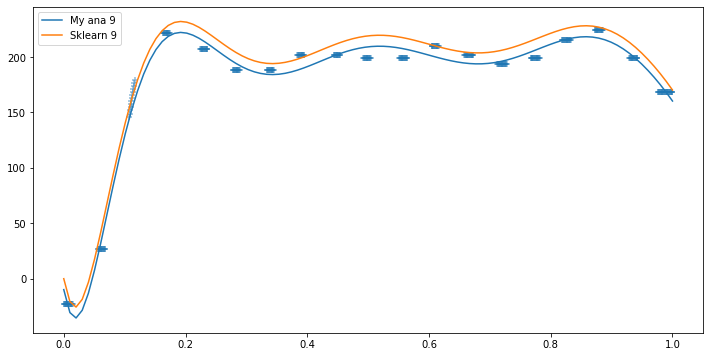

In [24]:
def PolyCoefficients(x, coeffs):
    o = len(coeffs)

    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

x=np.linspace(0,1,100)

plt.figure(figsize=(12,6))
plt.plot(x, PolyCoefficients(x, fl_9),label="My ana 9")
#plt.plot(x, PolyCoefficients(x, fl_21),label="My ana 21")

plt.plot(x, PolyCoefficients(x, linmod9),label="Sklearn 9")
#plt.plot(x, PolyCoefficients(x, linmod21),label="Sklearn 21")

plt.scatter(fl_X,fl_y, alpha=0.5, marker="+")
plt.legend()
plt.show()

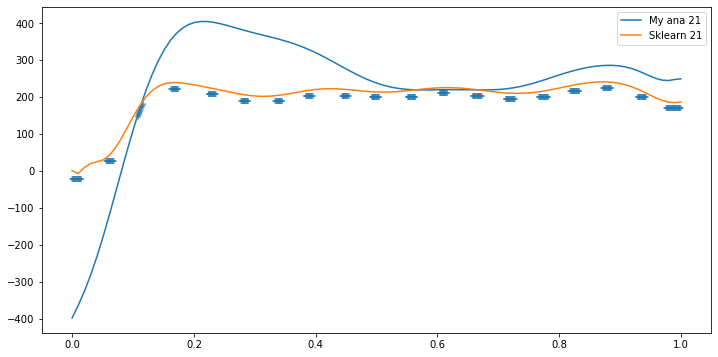

In [25]:
x=np.linspace(0,1,100)

plt.figure(figsize=(12,6))

plt.plot(x, PolyCoefficients(x, fl_21),label="My ana 21")
plt.plot(x, PolyCoefficients(x, linmod21),label="Sklearn 21")

plt.scatter(fl_X,fl_y, alpha=0.5, marker="+")
plt.legend()
plt.show()

### MSE metoda analityczna


In [26]:
y_pred_num_fl9 = np.empty(len(fl_y))

for i in range(len(fl_y)):
    y_pred_num_fl9[i] = PolyCoefficients(fl_X[i], fl_9)

MSE_ana_fl9 = np.square(np.subtract(fl_X, y_pred_num_fl9)).mean()

In [27]:
y_pred_num_fl21 = np.empty(len(fl_y))

for i in range(len(fl_y)):
    y_pred_num_fl21[i] = PolyCoefficients(fl_X[i], fl_21)

MSE_ana_fl21 = np.square(np.subtract(fl_X, y_pred_num_fl21)).mean()

### MSE sklearn linear_model

In [28]:
y_pred_num_fl9sk = np.empty(len(fl_y))

for i in range(len(fl_y)):
    y_pred_num_fl9sk[i] = PolyCoefficients(fl_X[i], linmod9)

MSE_sk_fl9sk = np.square(np.subtract(fl_X, y_pred_num_fl9sk)).mean()

In [29]:
y_pred_num_fl21sk = np.empty(len(fl_y))

for i in range(len(fl_y)):
    y_pred_num_fl21sk[i] = PolyCoefficients(fl_X[i], linmod21)

MSE_sk_fl21sk = np.square(np.subtract(fl_X, y_pred_num_fl21sk)).mean()

### Porównanie

In [30]:
print("Dla wielomianu 9 rzędu własna implementacja uzyskała MSE: ",MSE_ana_fl9, "W czasie: ", '{:f}'.format(ana_fl9_ex_time))
print("Dla wielomianu 9 rzędu, sklearn linear model uzyskał MSE: ",MSE_sk_fl9sk,  "W czasie: ",'{:f}'.format(sk_fl9_ex_time))

Dla wielomianu 9 rzędu własna implementacja uzyskała MSE:  35064.07970606281 W czasie:  0.000030
Dla wielomianu 9 rzędu, sklearn linear model uzyskał MSE:  38647.26860622902 W czasie:  0.001050


In [31]:
print("Dla wielomianu 21 rzędu własna implementacja uzyskała MSE: ",MSE_ana_fl21, "W czasie: ", '{:f}'.format(ana_fl21_ex_time)  )
print("Dla wielomianu 21 rzędu, sklearn linear model uzyskał MSE: ",MSE_sk_fl21sk, "W czasie: ",'{:f}'.format(sk_fl21_ex_time) )

Dla wielomianu 21 rzędu własna implementacja uzyskała MSE:  79066.06912901823 W czasie:  0.000090
Dla wielomianu 21 rzędu, sklearn linear model uzyskał MSE:  41230.93409414965 W czasie:  0.000610
